In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Reshape, TimeDistributed, Flatten, RepeatVector
from keras.layers import LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

Using TensorFlow backend.


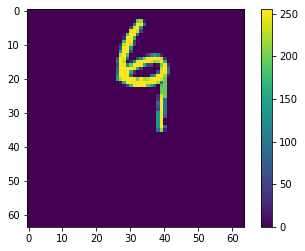

(9900, 10, 64, 64, 1)
(9900, 10, 64, 64, 1)


In [2]:
data = np.load("mnist_test_seq.npy")
data = np.swapaxes(data, 0, 1)

data_test_input = data[100:10000, :10, :, :]
data_test_output = data[100:10000, :10, :, :]

data_actual_test_input = data[0:100, :10, :, :]
data_actual_test_output = data[0:100, :10, :, :]

plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

#Scaling values between -1 and 1
data_test_input = (data_test_input - 127.5) / 255.0
data_test_output = (data_test_output - 127.5) / 255.0
data_actual_test_input = (data_actual_test_input - 127.5) / 255.0
data_actual_test_output = (data_actual_test_output - 127.5) / 255.0

#Adding Channels of dimension 1 IMPORTANT if using CNNs
train_in = np.expand_dims(data_test_input, axis=4)
train_out = np.expand_dims(data_test_output, axis=4)
test_in = np.expand_dims(data_actual_test_input, axis=4)
test_out = np.expand_dims(data_actual_test_output, axis=4)

print(train_in.shape)
print(train_out.shape)

# output_frames.shape
# output_frames = np.squeeze(output_frames, axis=1)
# test_output_frames = np.squeeze(test_output_frames, axis=1)
# plt.plot(test_output_frames[0])
# plt.show()

# output_frames.shape
# plt.imshow(np.squeeze(test_output_frames[1], axis=2))
# plt.show()

In [3]:
!ls

Autoencoder.ipynb               MNIST-CNN.ipynb
Boston-Housing-Prelim (1).ipynb Network Visualization.ipynb
ClairVoyance                    NeuralNetTutorial.ipynb
EncDecCNN.ipynb                 TensorflowCNN.ipynb
KNN-MNIST.ipynb                 mnist_test_seq.npy


In [4]:

#ENCODER
model = Sequential()
model.add(ConvLSTM2D(filters=10, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=5, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=False))
model.add(BatchNormalization())

#Add dense layers??

out_size = model.layers[-1].output_shape
num_repeat = 10

model.add(Flatten()) #encoded


#DECODER
model.add(RepeatVector(num_repeat))
model.add(Reshape(tuple([num_repeat]) + out_size[1:]))

model.add(ConvLSTM2D(filters=5, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=10, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())





#Have model return one image with one channel/filter
#Output shape = (batch_size, 1, 64, 64, 1)
# model.add(BatchNormalization())

# model.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
#                activation='sigmoid',
#                padding='same', data_format='channels_last'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 64, 64, 10)    4000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 64, 64, 10)    40        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 64, 64, 5)     2720      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64, 64, 5)     20        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 64, 64, 1)         220       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 1)         4         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [5]:
print(train_out.shape)

(9900, 10, 64, 64, 1)


Epoch: 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
9900/9900 [==============================] - 2506s 253ms/step - loss: 0.2784


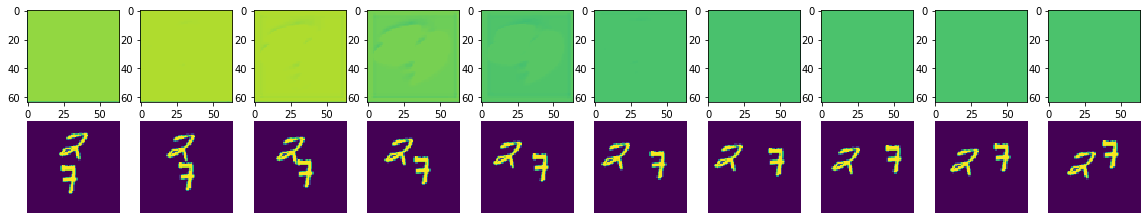

Epoch: 2
Epoch 1/1
9900/9900 [==============================] - 2533s 256ms/step - loss: 0.0492


<Figure size 432x288 with 0 Axes>

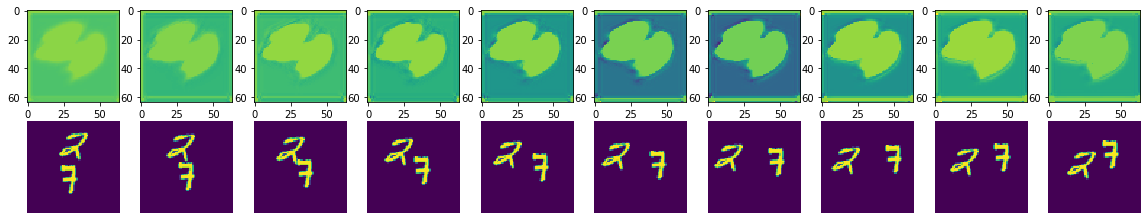

Epoch: 3
Epoch 1/1
9900/9900 [==============================] - 2583s 261ms/step - loss: 0.0352


<Figure size 432x288 with 0 Axes>

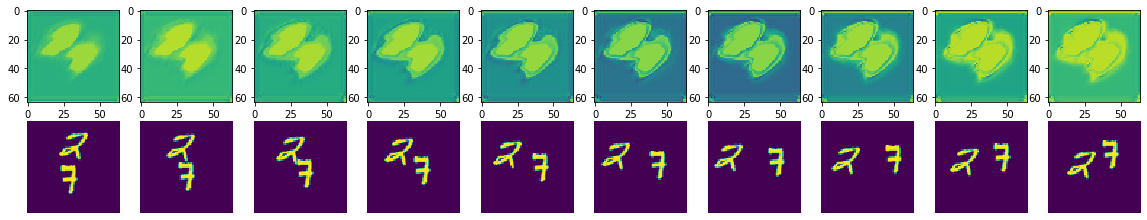

Epoch: 4
Epoch 1/1
9900/9900 [==============================] - 2578s 260ms/step - loss: 0.0316


<Figure size 432x288 with 0 Axes>

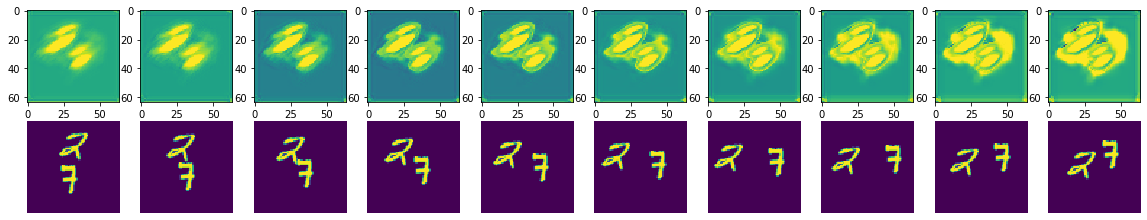

Epoch: 5
Epoch 1/1
9900/9900 [==============================] - 2543s 257ms/step - loss: 0.0303


<Figure size 432x288 with 0 Axes>

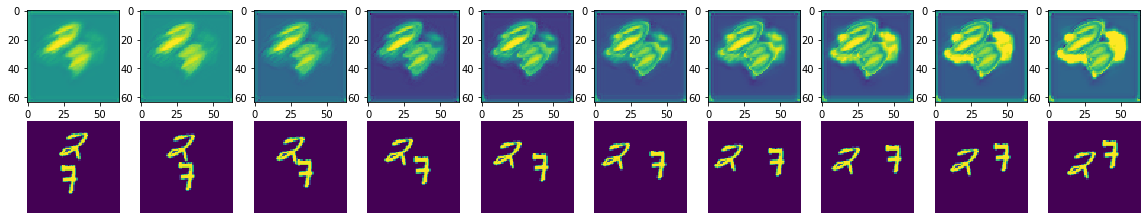

Epoch: 6
Epoch 1/1
9900/9900 [==============================] - 2539s 257ms/step - loss: 0.0285


<Figure size 432x288 with 0 Axes>

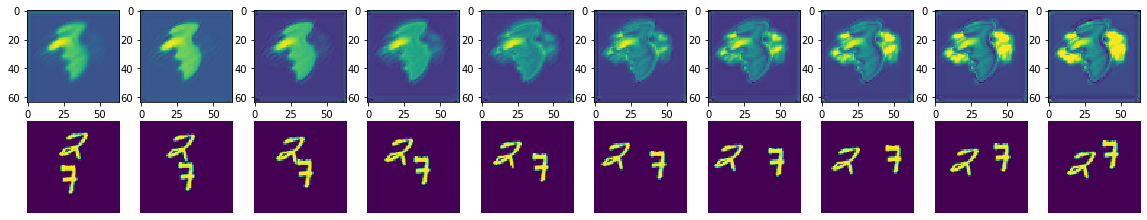

Epoch: 7
Epoch 1/1
9900/9900 [==============================] - 2538s 256ms/step - loss: 0.0270


<Figure size 432x288 with 0 Axes>

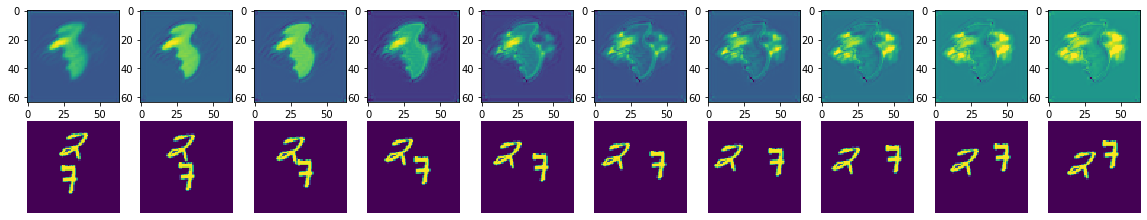

Epoch: 8
Epoch 1/1
9900/9900 [==============================] - 2539s 257ms/step - loss: 0.0263


<Figure size 432x288 with 0 Axes>

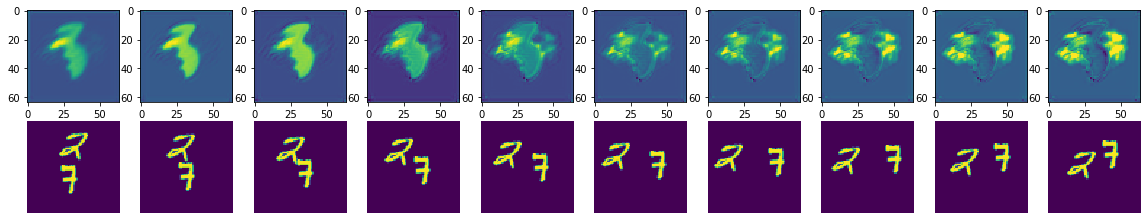

Epoch: 9
Epoch 1/1
9900/9900 [==============================] - 2545s 257ms/step - loss: 0.0256


<Figure size 432x288 with 0 Axes>

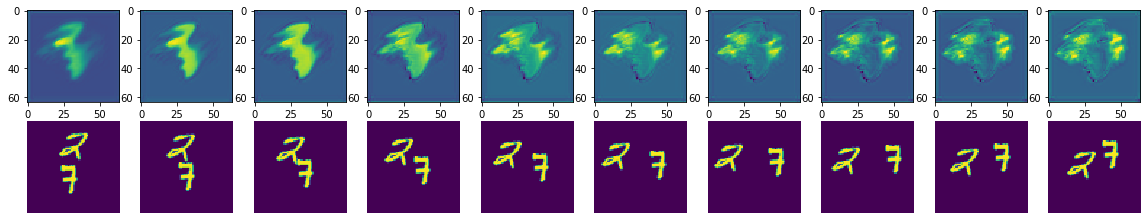

Epoch: 10
Epoch 1/1
9900/9900 [==============================] - 2547s 257ms/step - loss: 0.0240


<Figure size 432x288 with 0 Axes>

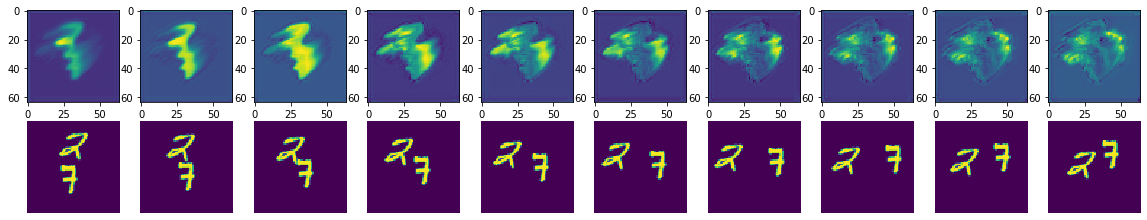

Epoch: 11
Epoch 1/1
9900/9900 [==============================] - 2550s 258ms/step - loss: 0.0230


<Figure size 432x288 with 0 Axes>

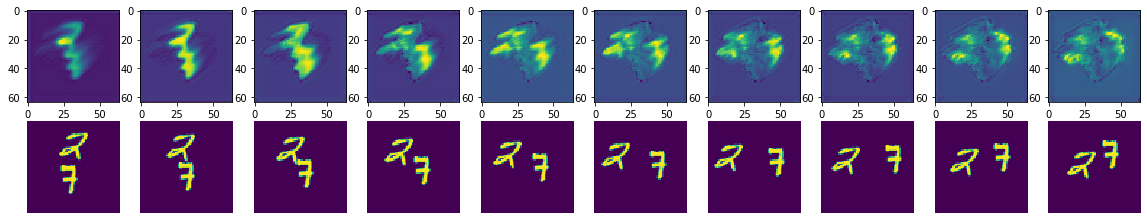

Epoch: 12
Epoch 1/1
9900/9900 [==============================] - 2552s 258ms/step - loss: 0.0222


<Figure size 432x288 with 0 Axes>

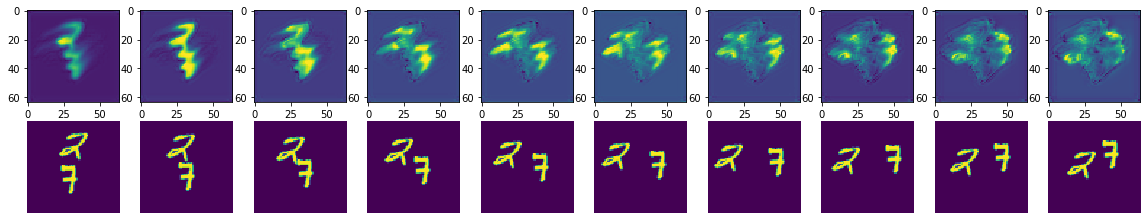

Epoch: 13
Epoch 1/1
9900/9900 [==============================] - 2568s 259ms/step - loss: 0.0214


<Figure size 432x288 with 0 Axes>

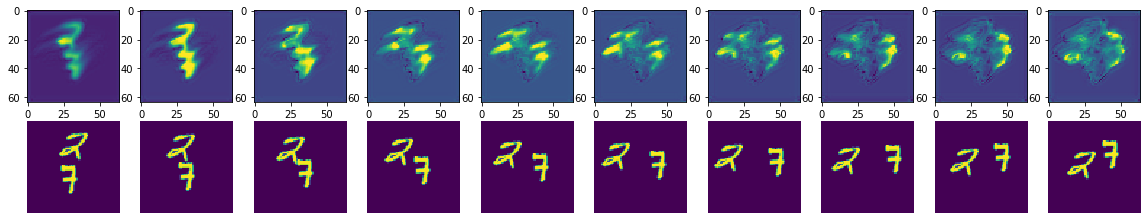

Epoch: 14
Epoch 1/1
9900/9900 [==============================] - 2555s 258ms/step - loss: 0.0208


<Figure size 432x288 with 0 Axes>

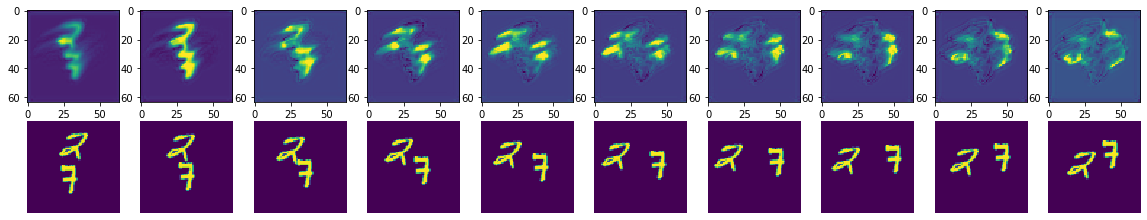

Epoch: 15
Epoch 1/1
9900/9900 [==============================] - 2549s 257ms/step - loss: 0.0203


<Figure size 432x288 with 0 Axes>

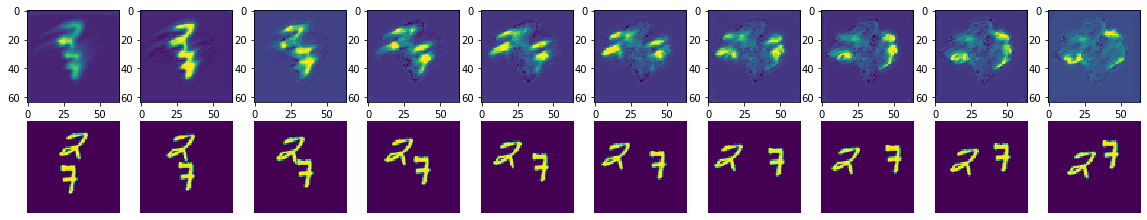

Epoch: 16
Epoch 1/1
9900/9900 [==============================] - 2560s 259ms/step - loss: 0.0198


<Figure size 432x288 with 0 Axes>

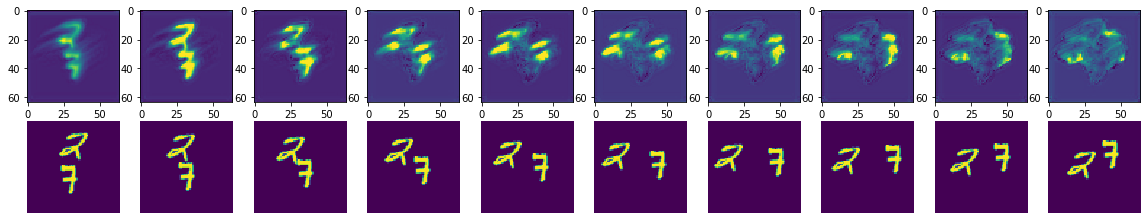

Epoch: 17
Epoch 1/1
9900/9900 [==============================] - 2555s 258ms/step - loss: 0.0194


<Figure size 432x288 with 0 Axes>

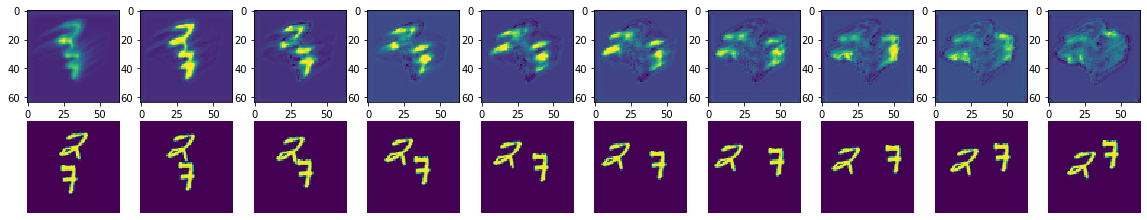

Epoch: 18
Epoch 1/1
9900/9900 [==============================] - 2560s 259ms/step - loss: 0.0189


<Figure size 432x288 with 0 Axes>

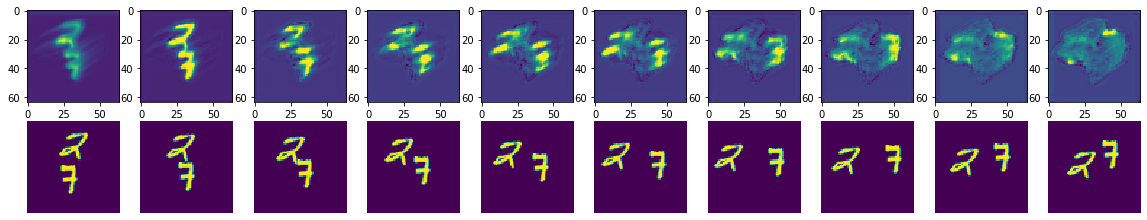

Epoch: 19
Epoch 1/1
9900/9900 [==============================] - 2556s 258ms/step - loss: 0.0183


<Figure size 432x288 with 0 Axes>

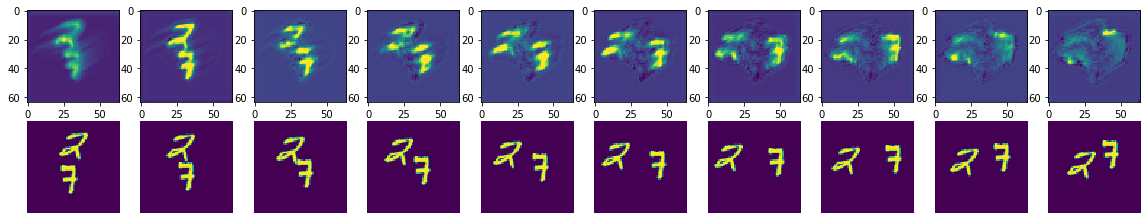

<Figure size 432x288 with 0 Axes>

In [6]:
for epoch in range(1,20):
    print("Epoch:",epoch)
    model.fit(train_in, train_out, batch_size=30, epochs=1)
    
    inputs = test_in[:1, :10]
    ground_truth = test_out[:1, :10]
    predictions = model.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()